In [ ]:
!pip install PyDrive
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#!pip install PyDrive
#!pip install tf-explain

#from keras.utils import to_categorical
import numpy as np
import pandas as pd

#Python Imaging Library 
from PIL import Image
from PIL import UnidentifiedImageError
import requests

# BytesIO is used for binary data
from io import BytesIO
from numpy import asarray

import random
import matplotlib.pyplot as plt
import cv2

In [ ]:

#Add google drive directory to the jpynb
from google.colab import drive
drive.mount('/content/drive')

from google.colab import auth
auth.authenticate_user()
#gspread works to open google sheets files 
import gspread
#Use the credentials that were provided to create a credential object to later 
#access the google drive where the google sheets are kept
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

Mounted at /content/drive


In [ ]:
#define a workbook object by opening the google doc 
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1cHoIJGK5QR5Tt9LmV3JqV0tfpWN8iZ4vE3rBVEG5hYk/edit#gid=0')

#select specific sheet from the overall workbook
tag_sheet = wb.worksheet('tags (RO)')

#collect the values 
tag_data = tag_sheet.get_all_values()

#convert into pandas DataFrame 
tag_df = pd.DataFrame(tag_data)
tag_df.columns = tag_df.iloc[0]
tag_df = tag_df.iloc[1:]

primary_tags = tag_df['primary_tag'].unique() # get each tag name in primary tag column
tags = []

for primary_tag in primary_tags:
    primary_home_df = tag_df[tag_df['primary_tag'] == primary_tag] # loop each tag name, for ex with home is in the first tag
    secondary_tags = primary_home_df['secondary_tag'].unique()  # get each tag name in secondary tag with primary tag name home (home is just an example of first tag)
    for secondary_tag in secondary_tags:
        secondary_df = primary_home_df[primary_home_df['secondary_tag'] == secondary_tag] # loop each secondary tag name with primary tag name home
        tertiary_tags = secondary_df['tertiary_tag'].unique() #get each tag name in tertiary tag with each secondary tag
        tag = []
        for tertiary_tag in tertiary_tags:
            tags.append([primary_tag, secondary_tag, tertiary_tag]) # append to array

combinations_dictionary = {}
keys = []

#generate the keys which are from a value of 1 to the number of combinations we have
for i in range(1, len(tags)+1):
  keys.append(i)

#combine the keys and combinations into a dictionary
for i, j in zip(keys, tags):
  combinations_dictionary[i] = j

tertiary_tags = {}
for i, j in zip(keys, tag_df["tertiary_tag"]):
  tertiary_tags[j] = i

In [ ]:
print(combinations_dictionary)

{1: ['home', 'appliances', 'laundry washer'], 2: ['home', 'appliances', 'dishwasher'], 3: ['home', 'appliances', 'laundry dryer'], 4: ['home', 'appliances', 'refrigerator'], 5: ['home', 'appliances', 'freezer'], 6: ['home', 'appliances', 'space heater'], 7: ['home', 'appliances', 'oscillating fan'], 8: ['home', 'appliances', 'ceiling fan'], 9: ['home', 'appliances', 'humidifier'], 10: ['home', 'appliances', 'dehumidifier'], 11: ['home', 'appliances', 'air purifier'], 12: ['home', 'appliances', 'cooktop'], 13: ['home', 'appliances', 'portable stove'], 14: ['home', 'appliances', 'toaster oven'], 15: ['home', 'appliances', 'microwave'], 16: ['home', 'kitchen', 'pop up toaster'], 17: ['home', 'kitchen', 'coffee maker'], 18: ['home', 'kitchen', 'mixer'], 19: ['home', 'kitchen', 'food processor'], 20: ['home', 'kitchen', 'coffee grinder'], 21: ['home', 'kitchen', 'blender'], 22: ['home', 'kitchen', 'juicer'], 23: ['home', 'kitchen', 'cooker'], 24: ['home', 'kitchen', 'food steamer'], 25: ['h

In [ ]:
print(combinations_dictionary[1][2])

dishwasher


In [ ]:
print(tertiary_tags)

{'laundry washer': 1, 'dishwasher': 2, 'laundry dryer': 3, 'refrigerator': 4, 'freezer': 5, 'space heater': 6, 'oscillating fan': 7, 'ceiling fan': 8, 'humidifier': 9, 'dehumidifier': 10, 'air purifier': 11, 'cooktop': 12, 'portable stove': 13, 'toaster oven': 14, 'microwave': 15, 'pop up toaster': 16, 'coffee maker': 17, 'mixer': 18, 'food processor': 19, 'coffee grinder': 20, 'blender': 21, 'juicer': 22, 'cooker': 23, 'food steamer': 24, 'fryer': 25, 'dehydrator': 26, 'food chopper': 27, 'food slicer': 28, 'dish rack': 29, 'fruit basket': 30, 'trash can': 31, 'cooking pan': 32, 'cooking pot': 33, 'cast iron skillet': 34, 'braiser': 35, 'wok': 36, 'baking tray': 37, 'mesh strainer': 38, 'colander': 39, 'jar': 40, 'food storage container': 41, 'kettle': 42, 'pitcher': 43, 'jug': 44, 'bottle': 45, 'storage box': 46, 'plastic cutlery': 47, 'wood cutlery': 48, 'metal cutlery': 49, 'knives set': 50, 'long knives': 51, 'spatula': 52, 'solid turner': 53, 'slotted turner': 54, 'ladle': 55, 'd

In [ ]:
zero_model = keras.models.load_model('drive/MyDrive/WSU_Capstone_Fall2021/Models/0_model_0.86.h5')
one_model = keras.models.load_model('drive/MyDrive/WSU_Capstone_Fall2021/Models/1_model_1.00.h5')
two_model = keras.models.load_model('drive/MyDrive/WSU_Capstone_Fall2021/Models/2_model_0.80.h5')
three_model = keras.models.load_model('drive/MyDrive/WSU_Capstone_Fall2021/Models/3_model_0.96.h5')

In [ ]:
zero_loaded_data = np.load('drive/MyDrive/WSU_Capstone_Fall2021/Data/cluster_0_data.npz')
zero_training_data = zero_loaded_data['training_data']
zero_training_labels = zero_loaded_data['training_labels']
zero_testing_data = zero_loaded_data['testing_data']
zero_testing_labels = zero_loaded_data['testing_labels']
zero_validation_data = zero_loaded_data['validation_data']
zero_validation_labels = zero_loaded_data['validation_labels']

one_loaded_data = np.load('drive/MyDrive/WSU_Capstone_Fall2021/Data/cluster_1_data.npz')
one_training_data = one_loaded_data['training_data']
one_training_labels = one_loaded_data['training_labels']
one_testing_data = one_loaded_data['testing_data']
one_testing_labels = one_loaded_data['testing_labels']
one_validation_data = one_loaded_data['validation_data']
one_validation_labels = one_loaded_data['validation_labels']

two_loaded_data = np.load('drive/MyDrive/WSU_Capstone_Fall2021/Data/cluster_2_data.npz')
two_training_data = two_loaded_data['training_data']
two_training_labels = two_loaded_data['training_labels']
two_testing_data = two_loaded_data['testing_data']
two_testing_labels = two_loaded_data['testing_labels']
two_validation_data = two_loaded_data['validation_data']
two_validation_labels = two_loaded_data['validation_labels']

three_loaded_data = np.load('drive/MyDrive/WSU_Capstone_Fall2021/Data/cluster_3_data.npz')
three_training_data = three_loaded_data['training_data']
three_training_labels = three_loaded_data['training_labels']
three_testing_data = three_loaded_data['testing_data']
three_testing_labels = three_loaded_data['testing_labels']
three_validation_data = three_loaded_data['validation_data']
three_validation_labels = three_loaded_data['validation_labels']

In [ ]:
print(zero_training_labels.shape)
print(zero_testing_labels.shape)
print(zero_validation_labels.shape)
print(one_training_labels.shape)
print(one_testing_labels.shape)
print(one_validation_labels.shape)
print(two_training_labels.shape)
print(two_testing_labels.shape)
print(two_validation_labels.shape)
print(three_training_labels.shape)
print(three_testing_labels.shape)
print(three_validation_labels.shape)

(1711,)
(480,)
(218,)
(189,)
(53,)
(25,)
(2120,)
(598,)
(279,)
(377,)
(111,)
(52,)


In [ ]:
training_data = np.concatenate((zero_training_data, one_training_data, two_training_data, three_training_data))
testing_data = np.concatenate((zero_testing_data, one_testing_data, two_testing_data, three_testing_data))
validation_data = np.concatenate((zero_validation_data, one_validation_data, two_validation_data, three_validation_data))

training_labels = np.concatenate((zero_training_labels, one_training_labels, two_training_labels, three_training_labels))
testing_labels = np.concatenate((zero_testing_labels, one_testing_labels, two_testing_labels, three_testing_labels))
validation_labels = np.concatenate((zero_validation_labels, one_validation_labels, two_validation_labels, three_validation_labels))

In [ ]:
print(len(training_data))
print(len(testing_data))
print(len(validation_data))
print(len(training_labels))
print(len(testing_labels))
print(len(validation_labels))

4397
1242
574
4397
1242
574


In [ ]:
#### KONA MODIFY THIS ####
inputs = keras.Input(shape=(150,150,3))

zero_model.trainable=False
one_model.trainable=False
two_model.trainable=False
three_model.trainable=False

y1 = zero_model(inputs)
y2 = one_model(inputs)
y3 = two_model(inputs)
y4 = three_model(inputs)

#outputs = layers.concatenate([y1,y2,y3,y4])
outputs = layers.add([y1,y2,y3,y4])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs, name="NetworkOfExperts")

In [ ]:
keras.utils.plot_model(ensemble_model, "ensemble_not_expanded.png", show_shapes=True, expand_nested=True)

In [ ]:
final_model = keras.models.Sequential(name="Final")

final_model.add(ensemble_model)
final_model.add(keras.layers.Dense(2048, activation='relu'))
final_model.add(keras.layers.Dense(1024, activation='relu'))
final_model.add(keras.layers.Dense(1024, activation='relu'))
final_model.add(keras.layers.Dense(512, activation='relu'))
#final_model.add(keras.layers.Dense(256, activation='relu'))

# NOTE THE NUMBER OF OUTPUT LAYERS
final_model.add(keras.layers.Dense(312, activation='softmax', name="Output"))

In [ ]:
for layer in final_model.layers:
    layer._name = layer.name + str("_final")

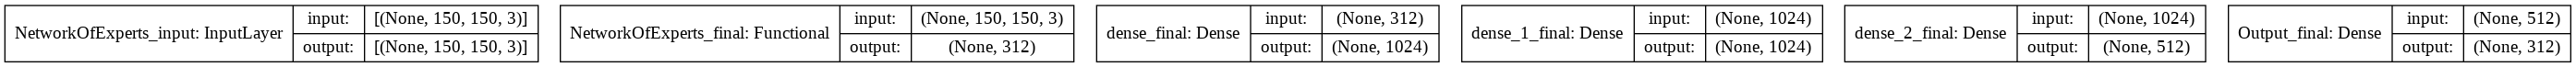

In [ ]:
keras.utils.plot_model(final_model, "final_not_expanded.png", show_shapes=True, expand_nested=False)

In [ ]:
my_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss',
        save_best_only=True
    ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
final_model.compile(optimizer='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              steps_per_execution = 50,
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

history = final_model.fit(training_data, training_labels, epochs=10, batch_size=32, validation_data=(validation_data, validation_labels), shuffle=1)

Epoch 1/10
138/138 [==============================] - 44s 319ms/step - loss: 3.4496 - sparse_categorical_accuracy: 0.2984 - val_loss: 1.9888 - val_sparse_categorical_accuracy: 0.5784
Epoch 2/10
138/138 [==============================] - 22s 157ms/step - loss: 0.9197 - sparse_categorical_accuracy: 0.7401 - val_loss: 1.9704 - val_sparse_categorical_accuracy: 0.6115
Epoch 3/10
138/138 [==============================] - 22s 157ms/step - loss: 0.5971 - sparse_categorical_accuracy: 0.8101 - val_loss: 1.8684 - val_sparse_categorical_accuracy: 0.6376
Epoch 4/10
138/138 [==============================] - 22s 157ms/step - loss: 0.5089 - sparse_categorical_accuracy: 0.8356 - val_loss: 2.0390 - val_sparse_categorical_accuracy: 0.6498
Epoch 5/10
138/138 [==============================] - 22s 157ms/step - loss: 0.4743 - sparse_categorical_accuracy: 0.8472 - val_loss: 2.0021 - val_sparse_categorical_accuracy: 0.6446
Epoch 6/10
138/138 [==============================] - 22s 157ms/step - loss: 0.4332 -

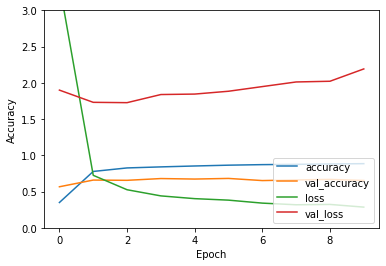

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'], label='accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 3])
plt.legend(loc='lower right')

In [ ]:
final_model.evaluate(testing_data, testing_labels)

39/39 [==============================] - 6s 145ms/step - loss: 2.0405 - sparse_categorical_accuracy: 0.6651


[2.04046893119812, 0.6650563478469849]

In [ ]:
ensemble_model.summary()

Model: "NetworkOfExperts"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Pet (Sequential)                (None, 311)          75076959    input_5[0][0]                    
__________________________________________________________________________________________________
Baby (Sequential)               (None, 311)          75076959    input_5[0][0]                    
__________________________________________________________________________________________________
Electronics (Sequential)        (None, 311)          75076959    input_5[0][0]                    
___________________________________________________________________________________

In [ ]:
final_model.save(
    'final_model_0.72',
    include_optimizer=True,
    save_format='tf'
  )

INFO:tensorflow:Assets written to: final_model_0.72/assets


INFO:tensorflow:Assets written to: final_model_0.72/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
from google.colab import files
!zip -r /content/final_model.zip /content/final_model_0.72
files.download("/content/final_model.zip")

  adding: content/final_model_0.72/ (stored 0%)
  adding: content/final_model_0.72/keras_metadata.pb (deflated 97%)
  adding: content/final_model_0.72/saved_model.pb (deflated 93%)
  adding: content/final_model_0.72/assets/ (stored 0%)
  adding: content/final_model_0.72/variables/ (stored 0%)
  adding: content/final_model_0.72/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/final_model_0.72/variables/variables.index (deflated 82%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
load_test = keras.models.load_model('drive/MyDrive/WSU_Capstone_Fall2021/Models/final/final_model_0.72')

OpError: ignored

In [ ]:
load_test.evaluate(testing_data, testing_labels)

47/47 [==============================] - 12s 184ms/step - loss: 2.1051 - sparse_categorical_accuracy: 0.7177


[2.105132818222046, 0.7176709771156311]

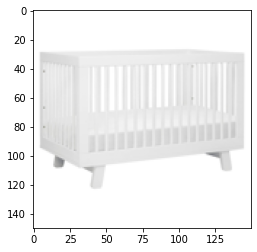

2


In [ ]:
plt.figure()
plt.imshow(testing_data[87]) 
plt.show()
print(testing_labels[87])

In [ ]:
product = np.expand_dims(testing_data[87], axis=0)

prediction = final_model.predict(product)

In [ ]:
counter = 0
prediction_index = 0
max = prediction[0][0]
for i in prediction[0]:
  if i > max:
    max = i
    prediction_index = counter
  counter += 1

print(prediction_index)

2
